In [19]:
import requests
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import os 

from dotenv import load_dotenv

In [21]:
load_dotenv()

True

In [22]:
AV_API_KEY = os.getenv('AV_API_KEY')
BASE_URL = 'https://www.alphavantage.co/query?'
TICKER = 'SPY'

In [23]:
params = {
    "function": "TIME_SERIES_DAILY_ADJUSTED",
    "symbol": TICKER,
    "outputsize":"compact",
    "apikey": AV_API_KEY
}

resp = requests.get(BASE_URL,params=params)

In [25]:
ts = resp.json()['Time Series (Daily)']

In [26]:
close_ts = {datetime.strptime(tick, '%Y-%m-%d'):float(ts[tick]['5. adjusted close']) for tick in ts}

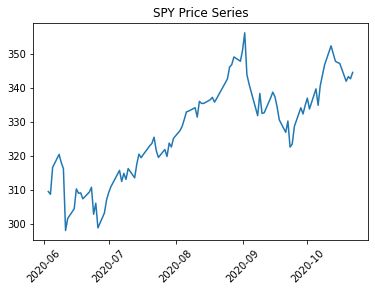

In [27]:
fig = sns.lineplot(x = close_ts.keys(),y = close_ts.values())
fig.set_title(f"{TICKER} Price Series")
plt.xticks(rotation=45)
plt.show()